# Imports

In [9]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import tqdm
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('vader_lexicon')
sns.set_style('whitegrid')
sns.set_palette('husl')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Reading e Analysing Data

In [2]:
data = pd.read_csv(
    'data/imdb-movie-reviews/imdb-dataset.csv.zip',
    compression='zip'
)
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Checking the data balance
data['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

## Preprocessing Text

In [4]:
def preprocess(text):
    # Lower case
    text = text.lower()

    # Remove special characters and HTML tags
    text = re.sub(r'<.*?>|[^a-zA-Z\s]', '', text)

    # Remove additional spaces
    text = text.strip()   
    
    return text

data['cleaned_review'] = data['review'].apply(preprocess)
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...


# Sentiment Analysis
We are going to test some differente sentiment analysis techniques

## VADER

In [5]:
sia = SentimentIntensityAnalyzer()

In [6]:
for idx, row in tqdm.tqdm(data.iterrows(), total=data.shape[0]):
    sentiment = sia.polarity_scores(row['cleaned_review'])
    data.at[idx, 'neg'] = sentiment['neg']
    data.at[idx, 'neu'] = sentiment['neu']
    data.at[idx, 'pos'] = sentiment['pos']
    data.at[idx, 'compound'] = sentiment['compound']

data.head()

100%|██████████| 50000/50000 [00:59<00:00, 834.43it/s]


,review,sentiment,cleaned_review,neg,neu,pos,compound
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,0.199,0.744,0.057,-0.9947
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production the filming tech...,0.054,0.757,0.188,0.9693
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,0.109,0.660,0.232,0.9712
3,Basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,0.141,0.790,0.069,-0.9117
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love in the time of money is a ...,0.053,0.795,0.152,0.9744


In [22]:
ax.get_xticks()

[0]

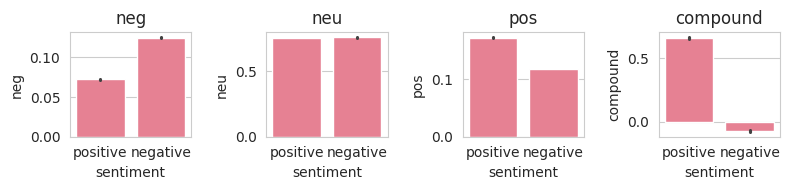

In [27]:
fig, axs = plt.subplots(1, 4, figsize=(8, 2))

for ax, col in zip(axs, ['neg', 'neu', 'pos', 'compound']):
    sns.barplot(data=data, x='sentiment', y=col, ax=ax)
    ax.set_title(col)

plt.tight_layout()
